In [2]:
from skimage import io
import matplotlib.pyplot as plt

In [4]:
img = io.imread('../data/raw/0104_p301s_nissl.jpg')

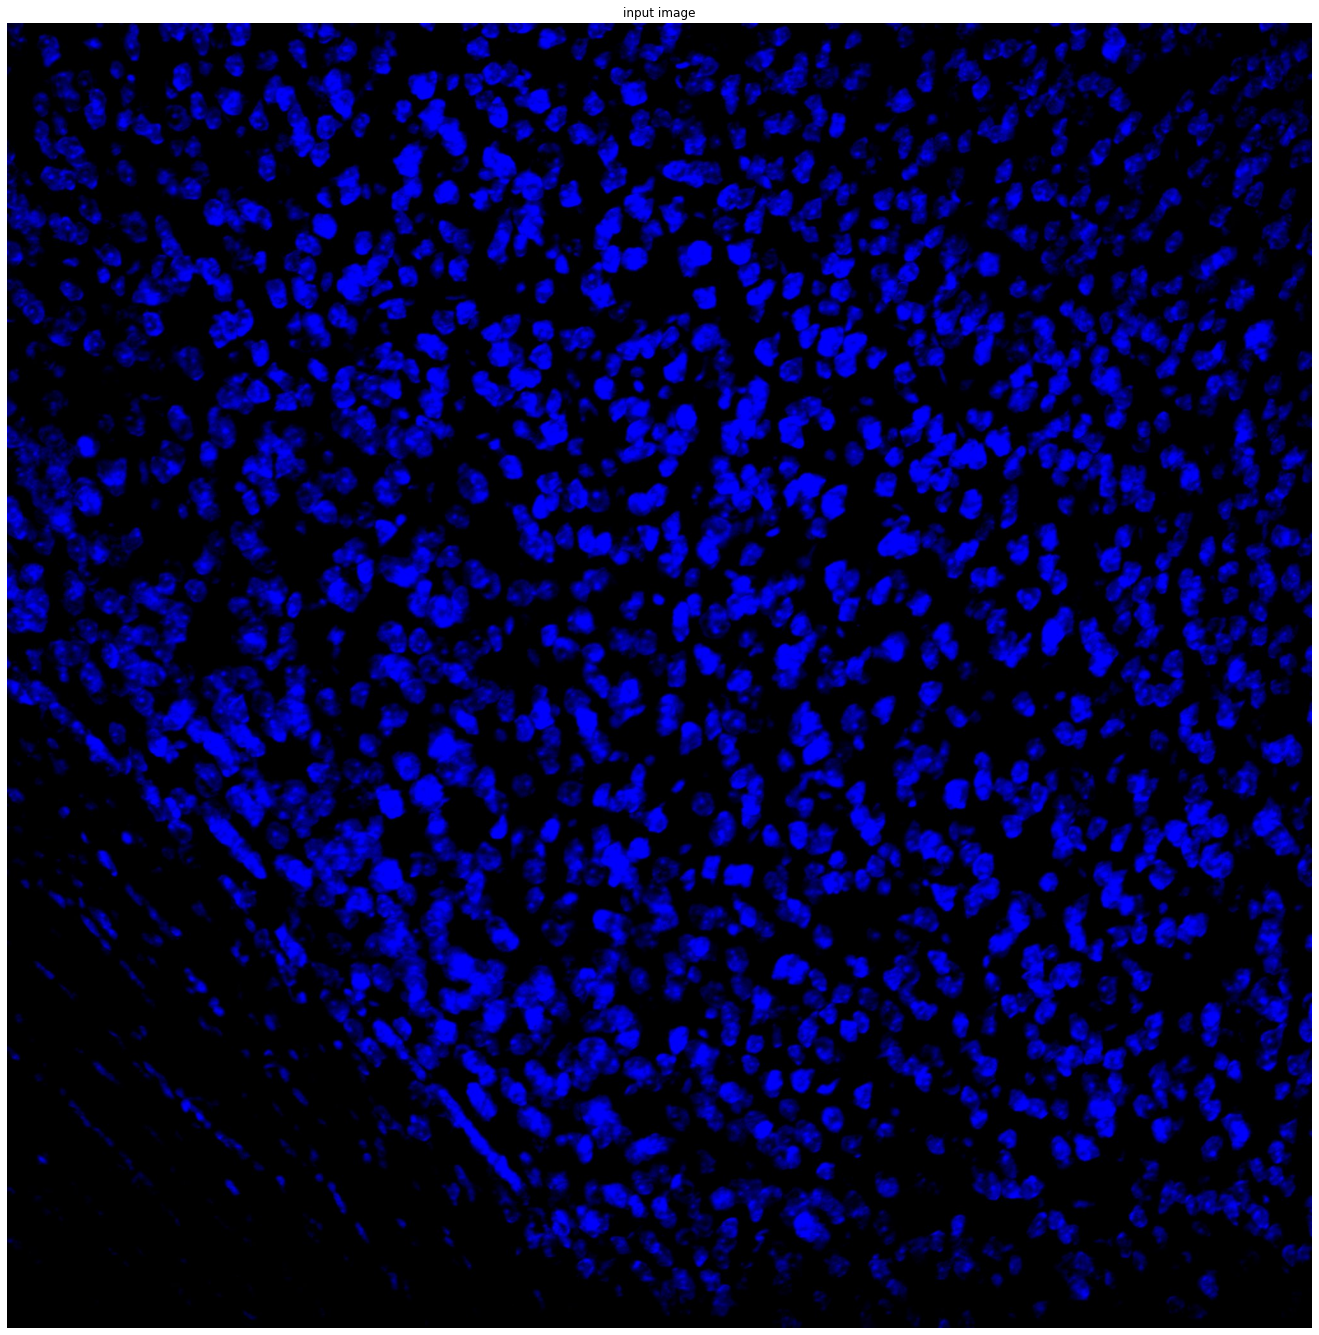

In [7]:
plt.figure(figsize=(24,24))
plt.imshow(img, cmap='gray')
plt.axis("off")
plt.title("input image")
plt.show()

In [13]:
2048 - 192

1856

crop1
0 512 0 512
crop2
1536 2048 0 512
crop3
1458 1970 474 986
crop4
340 852 891 1403


/tmp/ipykernel_269184/1995278177.py:20: UserWarning: ../data/interim/nissl_crop1.tif is a low contrast image
  io.imsave('../data/interim/nissl_' + key + '.tif', crop)
/tmp/ipykernel_269184/1995278177.py:20: UserWarning: ../data/interim/nissl_crop2.tif is a low contrast image
  io.imsave('../data/interim/nissl_' + key + '.tif', crop)
/tmp/ipykernel_269184/1995278177.py:20: UserWarning: ../data/interim/nissl_crop3.tif is a low contrast image
  io.imsave('../data/interim/nissl_' + key + '.tif', crop)
/tmp/ipykernel_269184/1995278177.py:20: UserWarning: ../data/interim/nissl_crop4.tif is a low contrast image
  io.imsave('../data/interim/nissl_' + key + '.tif', crop)


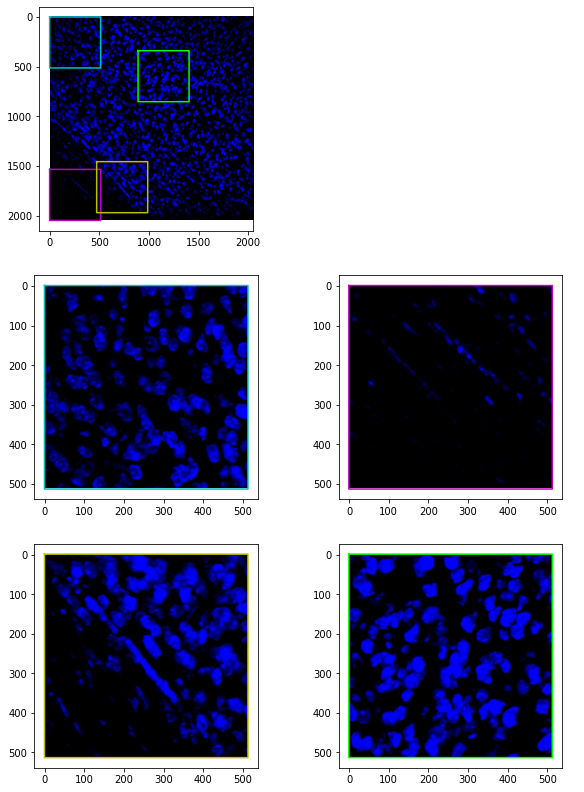

In [81]:
# image as ndarray is row-column-based, starting in the upper left corner
from skimage.draw import rectangle_perimeter

crops = {'crop1': [0, 512, 0, 512],
         'crop2': [1536,2048,0,512],
         'crop3': [1458, 1970, 474, 986],
         'crop4': [340, 852, 891, 1403]}
colors = ['c', 'm', 'y', 'lime']
num_crops = 4
fig, axes_old = plt.subplots(nrows=3, ncols=2, figsize = (10,14))
axes = np.concatenate(axes_old, axis=0)
axes[0].imshow(img)
axes[1].axis('off')
for i in range(num_crops):
    key = list(crops.keys())[i]
    row_start, row_end, col_start, col_end = crops[key]
    print(key)
    print(row_start, row_end, col_start, col_end)
    crop = img[row_start:row_end, col_start:col_end]
    io.imsave('../data/interim/nissl_' + key + '.tif', crop)
    
    rows, cols = rectangle_perimeter((row_start, col_start), end=(row_end, col_end))
    axes[0].plot(cols, rows, colors[i])
    
    axes[i+2].imshow(crop)
    rows, cols = rectangle_perimeter((0,0), end=(crop.shape[0], crop.shape[1]))
    axes[i+2].plot(cols, rows, colors[i])

plt.show()

In [63]:
axes_old = np.array([['ax0', 'ax1'],
                    ['ax2', 'ax3'],
                    ['ax4', 'ax5']])
axes_new = np.concatenate(axes_old, axis=0)
print(axes_old)
print(axes_new)

[['ax0' 'ax1']
 ['ax2' 'ax3']
 ['ax4' 'ax5']]
['ax0' 'ax1' 'ax2' 'ax3' 'ax4' 'ax5']


In [55]:
import numpy as np
axes2 = np.concatenate(axes, axis=None)
axes2

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

In [74]:
print(cols)
print(rows)
print(cols.shape)

[-1  0  1 ... -1 -1 -1]
[-1 -1 -1 ...  1  0 -1]
(2060,)


TypeError: 'module' object is not callable

In [75]:
crop.shape

(512, 512, 3)